# Canonical Discriminant Analysis on Iris dataset

In [1]:
from seaborn import load_dataset
import numpy as np
import pandas as pd

iris = load_dataset("iris")
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [2]:
# Chargement de la 
from scientisttools.discriminant_analysis import CANDISC

candisc = CANDISC(n_components=2,
                  target=["species"],
                  row_labels=iris.index,
                  features_labels=list(iris.columns[:-1]))

# Instanciattion
candisc.fit(iris)

CANDISC(features_labels=['sepal_length', 'sepal_width', 'petal_length',
                         'petal_width'],
        n_components=2, row_labels=RangeIndex(start=0, stop=150, step=1),
        target=['species'])

### Summary Information

In [3]:
candisc.summary_information_.T

,Total Sample Size,Variables,Classes,DF Total,DF Within Classes,DF Between Classes
value,150,4,3,149,147,2


#### Class level Information

In [4]:
candisc.class_level_information_

,n(k),p(k)
species,,
setosa,50,0.333333
versicolor,50,0.333333
virginica,50,0.333333


### Squared Mahalanobis Distances and Distance statistics

In [5]:
candisc.squared_mdist_

,setosa,versicolor,virginica
setosa,0.000000,89.864186,179.384713
versicolor,89.864186,0.000000,17.201066
virginica,179.384713,17.201066,0.000000


In [6]:
# Univariate statistics
candisc.univariate_test_statistis_

,Std. Dev.,R-squared,Rsq/(1-Rsq),F-statistic,Prob (F-statistic)
sepal_length,0.828066,0.618706,1.622646,119.264502,1.669669e-31
sepal_width,0.435866,0.400783,0.668844,49.160040,4.492017e-17
petal_length,1.765298,0.941372,16.056615,1180.161182,2.856777e-91
petal_width,0.762238,0.928883,13.061322,960.007147,4.169446e-85


In [7]:
candisc.anova_

sum_sq     df     mean_sq            F  \
sepal_length C(species)   63.212133    2.0   31.606067   119.264502   
             Residual     38.956200  147.0    0.265008          NaN   
sepal_width  C(species)   11.344933    2.0    5.672467    49.160040   
             Residual     16.962000  147.0    0.115388          NaN   
petal_length C(species)  437.102800    2.0  218.551400  1180.161182   
             Residual     27.222600  147.0    0.185188          NaN   
petal_width  C(species)   80.413333    2.0   40.206667   960.007147   
             Residual      6.156600  147.0    0.041882          NaN   

                               PR(>F)    eta_sq  omega_sq  
sepal_length C(species)  1.669669e-31  0.618706  0.611931  
             Residual             NaN       NaN       NaN  
sepal_width  C(species)  4.492017e-17  0.400783  0.391036  
             Residual             NaN       NaN       NaN  
petal_length C(species)  2.856777e-91  0.941372  0.940199  
             Residual             NaN       NaN       NaN  
petal_width  C(species)  4.169446e-85  0.928883  0.927467  
             Residual             NaN       NaN       NaN

In [8]:
# Multivariate
# Ne pas oublier la fonction print
print(candisc.manova_)

                   Multivariate linear model
                                                                
----------------------------------------------------------------
        species          Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0234 8.0000 288.0000  199.1453 0.0000
         Pillai's trace  1.1919 8.0000 290.0000   53.4665 0.0000
 Hotelling-Lawley trace 32.4773 8.0000 203.4024  582.1970 0.0000
    Roy's greatest root 32.1919 4.0000 145.0000 1166.9574 0.0000



In [9]:
# Likelihood test
candisc.likelihood_test_

,statistic,DDL num.,DDL den.,Pr>F
0,199.145344,8.0,288.0,1.110223e-16
1,13.793900,3.0,145.0,5.794465e-08


In [10]:
candisc.eig_.T

array([[ 32.1919292 ,  31.90653816,  99.1212605 ,  99.1212605 ],
       [  0.28539104,          nan,   0.8787395 , 100.        ]])

In [11]:
## Correlation between Canonical and Original Variables
# Total Canonical Structure
from scientisttools.extractfactor import get_candisc_var
pd.concat(get_candisc_var(candisc,choice="correlation"),axis=0)

LD1       LD2
Total   sepal_length  0.791888  0.217593
        sepal_width  -0.530759  0.757989
        petal_length  0.984951  0.046037
        petal_width   0.972812  0.222902
Between sepal_length  0.991468  0.130348
        sepal_width  -0.825658  0.564171
        petal_length  0.999750  0.022358
        petal_width   0.994044  0.108977
Within  sepal_length  0.222596  0.310812
        sepal_width  -0.119012  0.863681
        petal_length  0.706065  0.167701
        petal_width   0.633178  0.737242

In [12]:
# Raw Canonical Coefficients
from scientisttools.extractfactor import get_candisc_coef
coef = get_candisc_coef(candisc,choice="absolute")
coef

,LD1,LD2
sepal_length,-0.829378,0.024102
sepal_width,-1.534473,2.164521
petal_length,2.201212,-0.931921
petal_width,2.810460,2.839188
Intercept,-2.105106,-6.661473


In [13]:
# Class Means on Canonical Variables
candisc.gmean_coord_

,LD1,LD2
species,,
setosa,-7.607600,0.215133
versicolor,1.825049,-0.727900
virginica,5.782550,0.512767


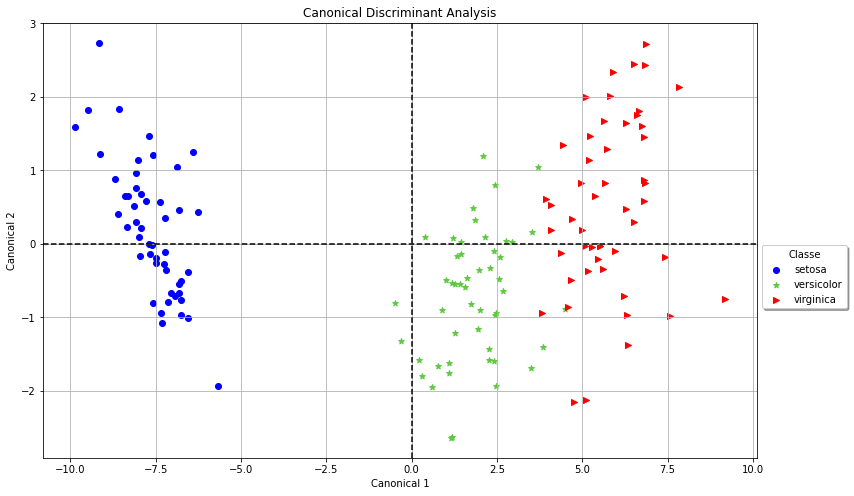

In [14]:
from scientisttools.pyplot import plotCANDISC
import matplotlib.pyplot as plt 

fig, axe =plt.subplots(figsize=(16,8))
plotCANDISC(candisc,color=["blue",'#5DC83F','red'],marker=['o',"*",'>'],ax=axe)
plt.show()

In [15]:
score_coef = get_candisc_coef(candisc,choice="score")
score_coef

,setosa,versicolor,virginica
sepal_length,6.314758,-1.531199,-4.783559
sepal_width,12.139317,-4.376043,-7.763274
petal_length,-16.946425,4.695665,12.250759
petal_width,-20.770055,3.062585,17.707469
Intercept,-15.477837,-2.021974,-33.537687


In [16]:
from scientisttools.extractfactor import summaryCANDISC
summaryCANDISC(candisc,to_markdown=True)

                     Canonical Discriminant Analysis - Results                     


Summary Information
|       |   Total Sample Size |   Variables |   Classes |   DF Total |   DF Within Classes |   DF Between Classes |
|:------|--------------------:|------------:|----------:|-----------:|--------------------:|---------------------:|
| value |                 150 |           4 |         3 |        149 |                 147 |                    2 |

Class Level information
|                 |   n(k) |     p(k) |
|:----------------|-------:|---------:|
| ('setosa',)     |     50 | 0.333333 |
| ('versicolor',) |     50 | 0.333333 |
| ('virginica',)  |     50 | 0.333333 |

Importance of components
|                         |    LD1 |     LD2 |
|:------------------------|-------:|--------:|
| Variance                | 32.192 |   0.285 |
| Difference              | 31.907 | nan     |
| % of var.               | 99.121 |   0.879 |
| Cumulative of % of var. | 99.121 | 100     |

Group means:

## Backward Elimination

In [17]:
from scientisttools.discriminant_analysis import STEPDISC

# Backward Elimination
stepdisc = STEPDISC(method="backward",alpha=0.01,model_train=True,verbose=True)
stepdisc.fit(candisc)

              Wilks L.  Partial L.          F       p-value
sepal_length  0.023983    0.925867   5.764977  3.903806e-03
sepal_width   0.029365    0.756192  23.213968  1.825963e-09
petal_length  0.033633    0.660223  37.053987  1.041714e-13
petal_width   0.030293    0.733028  26.222759  1.943866e-10



STEPDISC(method='backward', model_train=True)

In [18]:
stepdisc.train_model_

CANDISC(features_labels=['sepal_length', 'sepal_width', 'petal_length',
                         'petal_width'],
        row_labels=RangeIndex(start=0, stop=150, step=1), target=['species'])